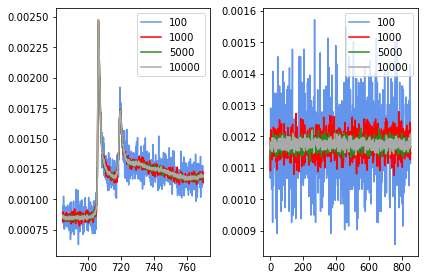

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir(r"C:\Users\pielsticker\Lukas\MPI-CEC\Projects\deepxps")

from xpsdeeplearning.simulation.base_model.spectra import MeasuredSpectrum
from xpsdeeplearning.simulation.base_model.figures import Figure


label = "Fe2p_Fe_metal"
datapath = r"C:\Users\pielsticker\Lukas\MPI-CEC\Projects\deepxps\xpsdeeplearning\data\references\NiCoFe"

filepath = datapath + "\\" + label + ".vms"

measured_spectrum = MeasuredSpectrum(filepath)
#fig_spectrum = Figure(measured_spectrum.x, measured_spectrum.lineshape, title=label)
#plt.show()

def poisson_noise(spectrum, lamb, signal_to_noise):
    intensity_max = np.max(spectrum.lineshape)
    intensity_min = np.min(spectrum.lineshape)

    intensity_diff = intensity_max - intensity_min
    noise = intensity_diff / signal_to_noise * 10
           
    poisson_noise = (
        noise
        * np.random.poisson(lamb, measured_spectrum.lineshape.shape)
        / lamb
    )
    
    measured_spectrum.lineshape = measured_spectrum.lineshape + poisson_noise

    return poisson_noise, measured_spectrum.lineshape

lambs = [100, 1000, 5000,  10000]
signal_to_noise = [20]

fig, ax = plt.subplots(nrows=1, ncols=2)

colors = [
    "cornflowerblue",
    "red",
    "forestgreen",
    "darkgrey",
    "deeppink",
    "darkviolet",
    "orange",
]

for i, lamb in enumerate(lambs):
    measured_spectrum = MeasuredSpectrum(filepath)
    noise, lineshape = poisson_noise(measured_spectrum, lamb=lamb, signal_to_noise = signal_to_noise[0])
    measured_spectrum.lineshape = lineshape
    measured_spectrum.normalize()
    ax[0].plot(measured_spectrum.x, measured_spectrum.lineshape.T, c=colors[i])
    noise /= np.sum(noise)
    ax[1].plot(noise, c=colors[i])
    ax[0].legend(lambs)
    ax[1].legend(lambs)
    
fig.tight_layout()
plt.show()